# Salary Prediction based on the Experience of employee.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split # creation of training and testing set
from sklearn.linear_model import LinearRegression # model
import pickle
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\vsmal\Downloads\Salary_Data.csv")

In [3]:
df


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


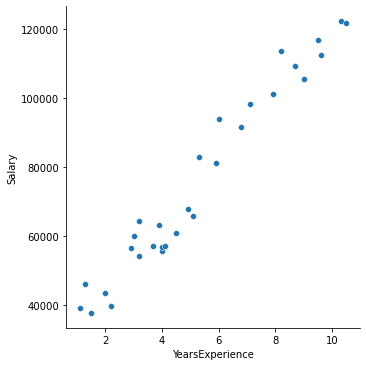

In [4]:
sns.relplot(x="YearsExperience",y="Salary",data=df)

In [5]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

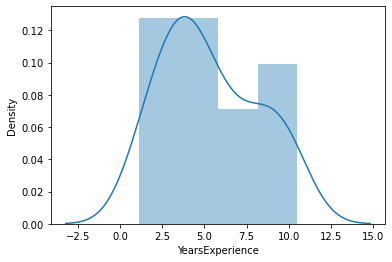

In [6]:
sns.distplot(df["YearsExperience"])

C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

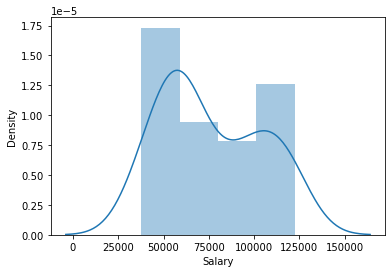

In [7]:
sns.distplot(df["Salary"])

# Dependant and Independant variables

In [8]:
x=df["YearsExperience"]   #independant variable
y=df["Salary"]   #dependant variable(features)

In [9]:

x.shape
y.shape

(30,)

In [10]:
x_matrics=x.values.reshape(-1,1)
x_matrics

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
#y_matrics=y.values.reshape(-1,1)
#y_matrics

# spliting training and testing data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_matrics,y,test_size=0.15)
                                              


In [13]:
x_train

array([[7.9],
       [8.2],
       [3.9],
       [1.3],
       [5.9],
       [9.5],
       [4.1],
       [7.1],
       [5.1],
       [4.5],
       [5.3],
       [3. ],
       [1.1],
       [8.7],
       [9.6],
       [9. ],
       [1.5],
       [4. ],
       [2.9],
       [2. ],
       [6. ],
       [4.9],
       [6.8],
       [4. ],
       [3.2]])

In [14]:
y_train

22    101302.0
23    113812.0
10     63218.0
1      46205.0
18     81363.0
26    116969.0
13     57081.0
21     98273.0
16     66029.0
14     61111.0
17     83088.0
6      60150.0
0      39343.0
24    109431.0
27    112635.0
25    105582.0
2      37731.0
12     56957.0
5      56642.0
3      43525.0
19     93940.0
15     67938.0
20     91738.0
11     55794.0
7      54445.0
Name: Salary, dtype: float64

In [15]:
x_test

array([[ 3.7],
       [10.5],
       [ 2.2],
       [ 3.2],
       [10.3]])

In [16]:
y_test

9      57189.0
29    121872.0
4      39891.0
8      64445.0
28    122391.0
Name: Salary, dtype: float64

# Estimate slope and intercept

In [17]:
reg=LinearRegression()   #model

In [18]:
reg.fit(x_train,y_train)  #find best m and c values

LinearRegression()

In [19]:
print("Estimated slope:",reg.coef_ )  #m value

Estimated slope: [9522.48049581]


In [20]:
print("Estimated intercept:",reg.intercept_)    #c value

Estimated intercept: 25645.63103171711


# Making prediction

In [21]:
pred=reg.predict(x_test)
pred

array([ 60878.8088662 , 125631.6762377 ,  46595.08812249,  56117.5686183 ,
       123727.18013853])

In [22]:
x_test

array([[ 3.7],
       [10.5],
       [ 2.2],
       [ 3.2],
       [10.3]])

In [23]:
pred=reg.predict(x_train)
pred

array([100873.2269486 , 103729.97109734,  62783.30496537,  38024.85567627,
        81828.26595698, 116109.19574189,  64687.80106453,  93255.24255195,
        74210.28156034,  68496.79326285,  76114.7776595 ,  54213.07251914,
        36120.35957711, 108491.21134524, 117061.44379147, 111347.95549398,
        39929.35177543,  63735.55301495,  53260.82446956,  44690.59202333,
        82780.51400656,  72305.78546117,  90398.49840321,  63735.55301495,
        56117.5686183 ])

In [24]:
x_train

array([[7.9],
       [8.2],
       [3.9],
       [1.3],
       [5.9],
       [9.5],
       [4.1],
       [7.1],
       [5.1],
       [4.5],
       [5.3],
       [3. ],
       [1.1],
       [8.7],
       [9.6],
       [9. ],
       [1.5],
       [4. ],
       [2.9],
       [2. ],
       [6. ],
       [4.9],
       [6.8],
       [4. ],
       [3.2]])

In [25]:
reg.predict(np.array(12.6).reshape(-1,1))

array([145628.88527889])

In [26]:
k=reg.score(x_train,y_train)    #training accuraccy
print("training accuraccy:",k*100)  
l=reg.score(x_test,y_test)  #testing accuraccy
print("testing accuraccy is:",l*100)

training accuraccy: 94.928806406081
testing accuraccy is: 97.56828322029205


# ploting regression line

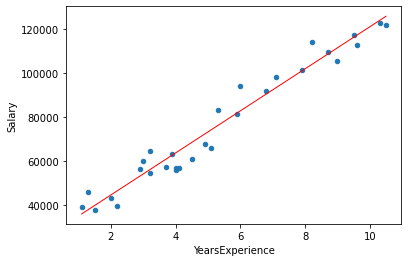

In [27]:
import matplotlib.pyplot as plt
allpred=reg.predict(x_matrics)
df.plot(kind="scatter",x="YearsExperience",y="Salary")
plt.plot(x,allpred,c='red',linewidth=1)

In [28]:
filename="lr1_model.pk"
pickle.dump(reg,open(filename,"wb"))